# Mine Pit Dewatering Solutions

Installed `PyGAF` testing.

In [1]:
import os
import pygaf
%matplotlib inline

Local testing

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../pygaf'))
import pygaf

Help.

In [ ]:
help(pygaf.MineTransStripLeakyQ())

## `MineTransStripLeakyQ` Class
Predict transient inflow for specified drawdown of mine pit water level for a strip-type mine and leaky aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [2]:
S10 = pygaf.MineTransStripLeakyQ()
S10.info()
S10.aq.info()

METHOD REFERENCE
----------------
Nguyen V. U. and Raudkivi A. J. 1982. Transient two-dimensional
groundwater flow. Hydrological Sciences; 4, 427-438.

Mine strip with transient, leaky-confined, horizontal flow
perpendicular to the pit wall. The solution estimates the transient
inflow rate for constant drawdown at the pit wall.

Conceptual Model:
- Infinite, leaky and homogeneous aquifer each side of mine pit.
- Mine pit fully penetrates the aquifer.
- Transient, horizontal, 1D and leaky flow.
- Horizontal pre-mining groundwater head.
- The mine pit should be long compared to its width such that
  it is reasonable to neglect groundwater inflow from the end walls.

Notes:
- Time zero corresponds to an instantaneous drawdown of the mine pit
  water level from the initial condition.
- A steady state can be reached when inflow to the pit is matched
  by leakage from the upper aquifer to the lower aquifer.

AQUIFER INFORMATION
-------------------
Type: 2D, leaky homogeneous aquifer
Name: 2D

Display drawings of the solution cartoon and aquifer.

In [5]:
S10.draw(dw=7)
S10.aq.draw()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Tony/anaconda3/lib/python3.7/site-packages/pygaf/images/MineTransStripLeaky.png'

Specify solution inputs.

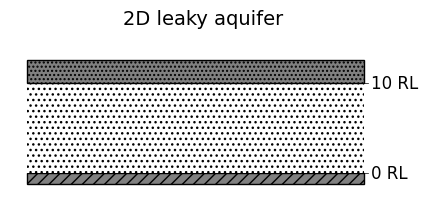

In [4]:
S10.Y = 5000
S10.aq.K = 0.1
S10.aq.Kleak = 1e-5
S10.aq.B = 10
S10.aq.Bleak = 5
S10.aq.Ss = 1e-4
S10.hp = 50
S10.h0 = 154
S10.aq.draw()

### Length of influence at steady state
The length of influence is the distance from the mine pit wall within which there is drawdown; over this distance the mine inflow rate is equal to the aquifer leakage rate.

In [5]:
print('Length of influence at steady state is', round(S10.xi_steady, 1))

Length of influence at steady state is 4606.9


### Mine pit inflow
Evaluate Time-varying discharge to the mine pit for a constant pit water level.

In [6]:
TIMES = [i * 365 for i in range(1,11)]
RATES = []
print('Time, Pit inflow rate')
for i, t in enumerate(TIMES):
    RATES.append(S10.qp(t))
    print(t, ',', round(S10.qp(t), 1))

Time, Pit inflow rate
365 , 1589.8
730 , 1498.1
1095 , 1479.0
1460 , 1473.6
1825 , 1471.8
2190 , 1471.2
2555 , 1470.9
2920 , 1470.8
3285 , 1470.8
3650 , 1470.8


Evaluate the mine pit inflow rate at steady state.

In [7]:
print('The mine pit inflow rate at steady state is', round(S10.qp_steady, 1))

The mine pit inflow rate at steady state is 1470.8


Evaluate the cumulative mine pit inflow volume by numerical integration.

In [8]:
N = 1000 # number of trapezoids
T = 3650 # time to evaluate cumulative volume

In [9]:
from numpy import trapz
TIM = [i for i in range(1,T, int(T/N))]
QP = [S10.qp(TIM[i]) for i in range(len(TIM))]
CUM_VOL = trapz(QP, TIM)
print('The cumulatve inflow volume at time', T, 'is', round(CUM_VOL, 1))

The cumulatve inflow volume at time 3650 is 5664511.2


### Distance-drawdown
Evaluate distance drawdown for a constant pit water level at a specified time. The maximum distance is set automatically based on the length of influence.

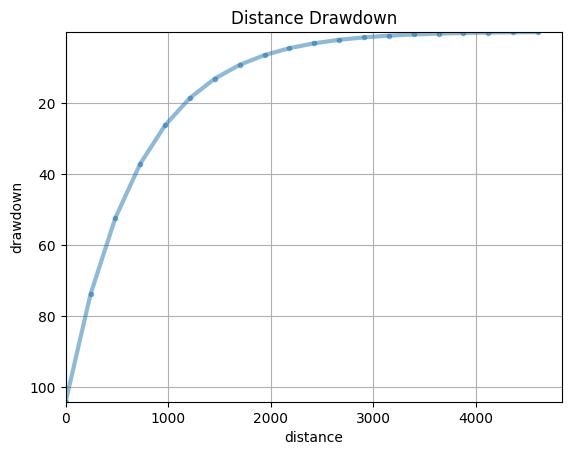

       distance    drawdown        head
0      0.000000  104.000000   50.000000
1    242.470398   73.784907   80.215093
2    484.940796   52.334968  101.665032
3    727.411193   37.106920  116.893080
4    969.881591   26.295932  127.704068
5   1212.351989   18.621160  135.378840
6   1454.822387   13.173549  140.826451
7   1697.292785    9.307830  144.692170
8   1939.763182    6.565887  147.434113
9   2182.233580    4.622383  149.377617
10  2424.703978    3.246197  150.753803
11  2667.174376    2.273068  151.726932
12  2909.644774    1.586201  152.413799
13  3152.115171    1.102513  152.897487
14  3394.585569    0.762886  153.237114
15  3637.055967    0.525240  153.474760
16  3879.526365    0.359637  153.640363
17  4121.996763    0.244781  153.755219
18  4364.467160    0.165547  153.834453
19  4606.937558    0.111212  153.888788


In [10]:
DD10 = S10.dd(5*365, n=20)
print(DD10)

Export results to a csv file using the Pandas `.to_csv` method.

In [11]:
DD10.to_csv(os.path.join('output', 'DD10.csv'))

## `MineTransStripConfQ` Class
Predict transient inflow for specified drawdown of mine pit water level for a strip-type mine and confined aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [12]:
S9 = pygaf.MineTransStripConfQ()
S9.info()
S9.aq.info()

METHOD REFERENCE
----------------
Nguyen V. U. and Raudkivi A. J. 1982. Transient two-dimensional
groundwater flow. Hydrological Sciences; 4, 427-438.

Mine strip with transient, unconfined, horizontal flow perpendicular
to the pit wall. The solution estimates the transient inflow rate
for constant drawdown at the pit wall.

Conceptual Model:
- Infinite, confined and homogeneous aquifer each side of mine pit.
- Mine pit fully penetrates the aquifer.
- Transient, horizontal, 1D and confined flow.
- Horizontal pre-mining groundwater head.
- The mine pit should be long compared to its width such that
  it is reasonable to neglect groundwater inflow from the end walls.

Notes:
- Time zero corresponds to an instantaneous drawdown of the mine pit
  water level from the initial condition.
- No steady state is reached (inflow tends toward zero at large times).

AQUIFER INFORMATION
-------------------
Type: 2D, confined homogeneous aquifer
Name: 2D confined aquifer
Hydraulic conductivity: 1 [L/

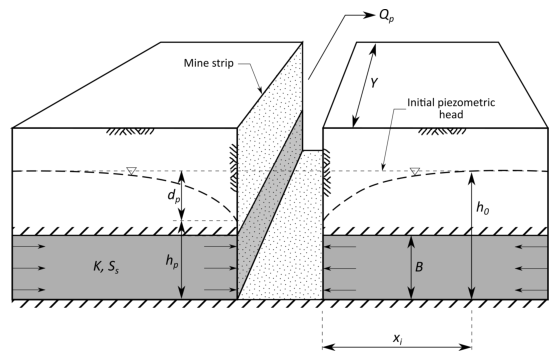

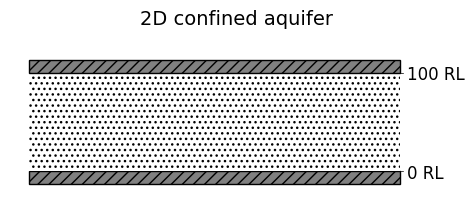

In [13]:
S9.draw(dw=7)
S9.aq.draw()

Specify solution input values.

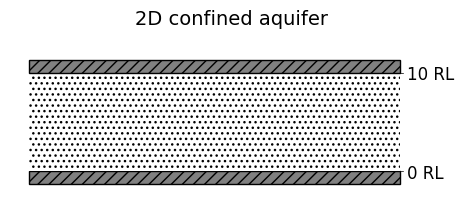

In [14]:
S9.Y = 5000
S9.aq.K = 0.1
S9.aq.Ss = 1e-4
S9.aq.B = 10
S9.h0 = 154
S9.hp = 50
S9.aq.draw()

### Length of influence
The length of influence is defined as the distance from the pit wall wherein drawdown is greater than 0.1% of the initial groundwater head.

In [15]:
TIMES = [i * 365 for i in range(1,11)]
print('Time, Length of influence')
for i, t in enumerate(TIMES):
    print(t, ',', round(S9.xi(t), 1))

Time, Length of influence
365 , 2715.6
730 , 3840.5
1095 , 4703.6
1460 , 5431.3
1825 , 6072.4
2190 , 6652.0
2555 , 7184.9
2920 , 7681.0
3285 , 8146.9
3650 , 8587.6


### Mine pit inflow
Evaluate time-varying pit inflow rate for constant pit water level.

In [16]:
TIMES = [i * 365 for i in range(1,11)]
print('Time, Pit inflow rate')
for i, t in enumerate(TIMES):
    print(t, ',', round(S9.qp(t), 1))

Time, Pit inflow rate
365 , 971.2
730 , 686.7
1095 , 560.7
1460 , 485.6
1825 , 434.3
2190 , 396.5
2555 , 367.1
2920 , 343.4
3285 , 323.7
3650 , 307.1


### Cumulative mine pit inflow
Evaluate cumulative pit inflow for constant pit water level.

In [17]:
TIMES = [i * 365 for i in range(1,11)]
print('Time, Pit inflow volume')
for i, t in enumerate(TIMES):
    print(t, ',', round(S9.qp_cum(t), 1))

Time, Pit inflow volume
365 , 708981.4
730 , 1002651.1
1095 , 1227991.8
1460 , 1417962.8
1825 , 1585330.6
2190 , 1736642.6
2555 , 1875788.4
2920 , 2005302.2
3285 , 2126944.1
3650 , 2241996.0


### Combined analysis

In [18]:
from numpy import linspace
import pandas
TIMES = [i * 365 for i in range(1,11)]
XI = [S9.xi(t) for t in TIMES]
QP = [S9.qp(t) for t in TIMES]
QPC = [S9.qp_cum(t) for t in TIMES]
DF = pandas.DataFrame({'time':TIMES, 'length of influence':XI, 'inflow rate':QP, 'cumulative inflow volume':QPC})
print(DF)
DF.to_csv(os.path.join('output', 'CA9.csv'))

   time  length of influence  inflow rate  cumulative inflow volume
0   365          2715.648513   971.207373              7.089814e+05
1   730          3840.506957   686.747319              1.002651e+06
2  1095          4703.641199   560.726838              1.227992e+06
3  1460          5431.297025   485.603686              1.417963e+06
4  1825          6072.374677   434.337141              1.585331e+06
5  2190          6651.953176   396.493750              1.736643e+06
6  2555          7184.930612   367.081883              1.875788e+06
7  2920          7681.013914   343.373660              2.005302e+06
8  3285          8146.945538   323.735791              2.126944e+06
9  3650          8587.634624   307.122738              2.241996e+06


### Distance-drawdown
Evaluate distance drawdown for constant pit water level and specified time; maximum drawdown distance is set automatically based on length of influence.

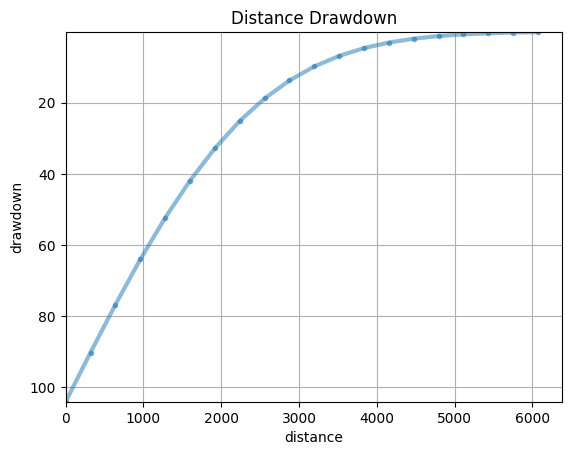

       distance    drawdown        head
0      0.000000  104.000000   50.000000
1    319.598667   90.183116   63.816884
2    639.197334   76.746653   77.253347
3    958.796002   64.039901   89.960099
4   1278.394669   52.354086  101.645914
5   1597.993336   41.903077  112.096923
6   1917.592003   32.813738  121.186262
7   2237.190670   25.126310  128.873690
8   2556.789338   18.803579  135.196421
9   2876.388005   13.746462  140.253538
10  3195.986672    9.812990  144.187010
11  3515.585339    6.837737  147.162263
12  3835.184006    4.649238  149.350762
13  4154.782674    3.083772  150.916228
14  4474.381341    1.994804  152.005196
15  4793.980008    1.258153  152.741847
16  5113.578675    0.773554  153.226446
17  5433.177343    0.463542  153.536458
18  5752.776010    0.270679  153.729321
19  6072.374677    0.154000  153.846000


In [19]:
print(S9.dd(5*365, n=20))

## `MineTransStripUnconfQ` Class
Predict transient inflow for specified drawdown of mine pit water level for a strip-type mine and unconfined aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [20]:
S8 = pygaf.MineTransStripUnconfQ()
S8.info()
S8.aq.info()

METHOD REFERENCE
----------------
Nguyen V. U. and Raudkivi A. J. 1982. Transient two-dimensional
groundwater flow. Hydrological Sciences; 4, 427-438.

Mine strip with transient, unconfined, horizontal flow
perpendicular to the pit wall. The solution estimates the transient
inflow rate for constant drawdown at the pit wall.

Conceptual Model:
- Infinite, unconfined and homogeneous aquifer each side of mine pit.
- Mine pit fully penetrates the aquifer.
- Transient, horizontal, 1D and unconfined flow.
- Horizontal pre-mining groundwater head.
- The mine pit should be long compared to its width such that
  it is reasonable to neglect groundwater inflow from the end walls.

Notes:
- Time zero corresponds to an instantaneous drawdown of the mine pit
  water level from the initial condition.
- No steady state is reached (inflow tends toward zero at large times).
- The analytical solution was obtained by linearising the non-linear
  PDE; the soultion will be most reliable when dp is small com

Display drawings of the solution cartoon and aquifer.

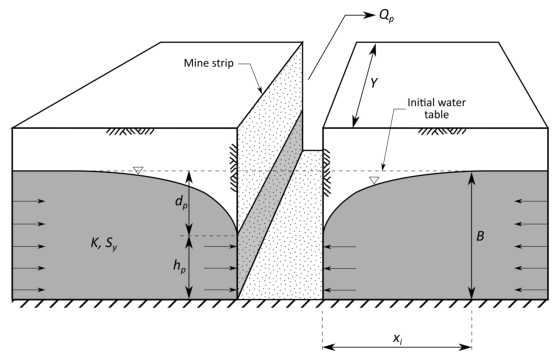

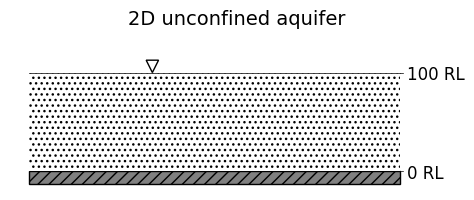

In [21]:
S8.draw(dw=7)
S8.aq.draw()

Specify solution input values.

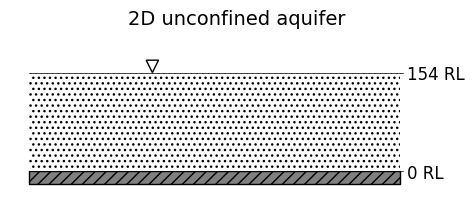

In [22]:
S8.Y = 5000
S8.aq.K = 0.1
S8.aq.Sy = 0.1
S8.aq.B = 154
S8.hp = 50
S8.aq.draw()

### Length of influence
The length of influence is the distance from the pit wall wherein drawdown is greater than 0.1% of initial groundwater head.

In [23]:
TIMES = [i * 365 for i in range(1,11)]
print('Time, Length of influence')
for i, t in enumerate(TIMES):
    print(t, ',', round(S8.xi(t), 1))

Time, Length of influence
365 , 1025.0
730 , 1449.6
1095 , 1775.4
1460 , 2050.1
1825 , 2292.0
2190 , 2510.8
2555 , 2712.0
2920 , 2899.2
3285 , 3075.1
3650 , 3241.4


### Mine pit inflow
Evaluate time-varying pit inflow rate for constant pit water level.

In [24]:
TIMES = [i * 365 for i in range(1,11)]
print('Time, Pit inflow rate')
for i, t in enumerate(TIMES):
    print(t, ',', round(S8.qp(t), 1))

Time, Pit inflow rate
365 , 25243.6
730 , 17849.9
1095 , 14574.4
1460 , 12621.8
1825 , 11289.3
2190 , 10305.7
2555 , 9541.2
2920 , 8925.0
3285 , 8414.5
3650 , 7982.7


### Cumulative mine pit inflow
Evaluate cumulative pit inflow for constant pit water level.

In [25]:
TIMES = [i * 365 for i in range(1,11)]
print('Time, Pit inflow volume')
for i, t in enumerate(TIMES):
    print(t, ',', round(S8.qp_cum(t), 1))

Time, Pit inflow volume
365 , 18427848.9
730 , 26060913.8
1095 , 31917970.5
1460 , 36855697.8
1825 , 41205922.8
2190 , 45138826.8
2555 , 48755505.3
2920 , 52121827.6
3285 , 55283546.7
3650 , 58273974.8


### Distance-drawdown
Evaluate distance drawdown for constant pit water level and specified time; maximum drawdown distance is set automatically based on length of influence.

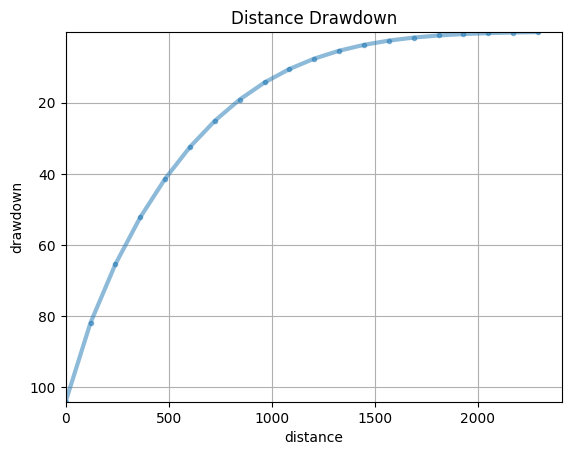

       distance    drawdown        head
0      0.000000  104.000000   50.000000
1    120.633905   81.805568   72.194432
2    241.267809   65.372087   88.627913
3    361.901714   52.192854  101.807146
4    482.535619   41.362007  112.637993
5    603.169523   32.419099  121.580901
6    723.803428   25.070943  128.929057
7    844.437333   19.095684  134.904316
8    965.071237   14.304424  139.695576
9   1085.705142   10.525683  143.474317
10  1206.339047    7.600122  146.399878
11  1326.972951    5.380022  148.619978
12  1447.606856    3.730725  150.269275
13  1568.240761    2.532476  151.467524
14  1688.874665    1.681820  152.318180
15  1809.508570    1.092126  152.907874
16  1930.142475    0.693166  153.306834
17  2050.776379    0.429849  153.570151
18  2171.410284    0.260363  153.739637
19  2292.044189    0.154000  153.846000


In [26]:
print(S8.dd(5*365, n=20))

## `MineSteadyStripLeakyDD` Class
Predict steady state drawdown for specified inflow rate to the mine pit for a strip-type mine and leaky aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [27]:
S7 = pygaf.MineSteadyStripLeakyDD()
S7.info()
S7.aq.info()

METHOD REFERENCE
----------------
Nguyen V. U. and Raudkivi A. J. 1982. Transient two-dimensional
groundwater flow. Hydrological Sciences; 4, 427-438.

Mine strip with steady-state, leaky-confined, horizontal flow
perpendicular to the pit wall. The solution estimates the drawdown
at the pit wall for prescribed total inflow to the pit from both
side of the strip.

Conceptual Model:

Lower Aquifer Conceptual Model:
- Infinite, leaky and homogeneous lower aquifer each side of
  mine pit.
- Mine pit fully penetrates lower aquifer.
- Steady, horizontal, 1D and leaky flow.
- Horizontal pre-mining groundwater head.
- The mine pit should be long compared to its width such that
  it is reasonable to neglect groundwater inflow from the end walls.

Notes:
- A steady state occurs when inflow to the mine pit is equal
  to leakage from the upper aquifer to the lower aquifer.

AQUIFER INFORMATION
-------------------
Type: 2D, leaky homogeneous aquifer
Name: 2D leaky aquifer
Hydraulic conductivity: 1 

Display drawings of the solution cartoon and aquifer.

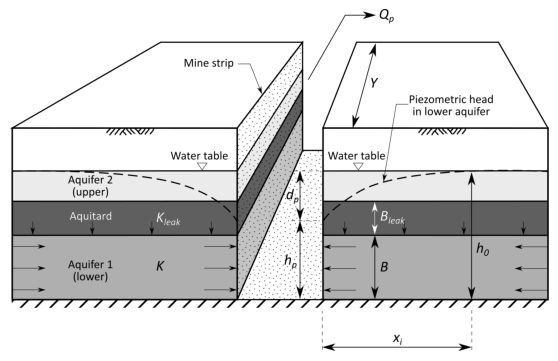

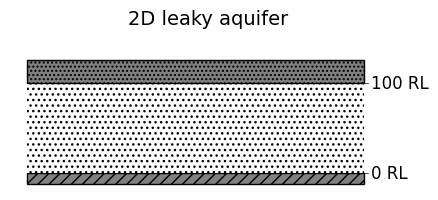

In [28]:
S7.draw(dw=7)
S7.aq.draw()

Specify solution input values.

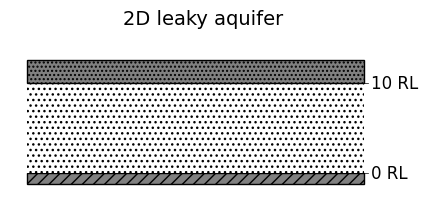

In [29]:
S7.Y = 5000
S7.aq.K = 1.54
S7.aq.Kleak = 1e-5
S7.aq.B = 10
S7.aq.Bleak = 5
S7.h0 = 154
S7.qp = 5770
S7.aq.draw()

### Length of influence
Length of influence is the distance from the pit wall wherein drawdown is greater than 0.1% of initial groundwater head.

In [30]:
print('Length of influence:', round(S7.xi, 1))

Length of influence: 18078.1


### Mine pit drawdown
Evaluate drawdown in the mine pit.

In [31]:
print('Steady pit drawdown:', round(S7.dp, 1))

Steady pit drawdown: 104.0


### Distance drawdown method
Evaluate drawdown at varying distance from the mine pit wall; maximum drawdown distance is set automatically based on length of influence.

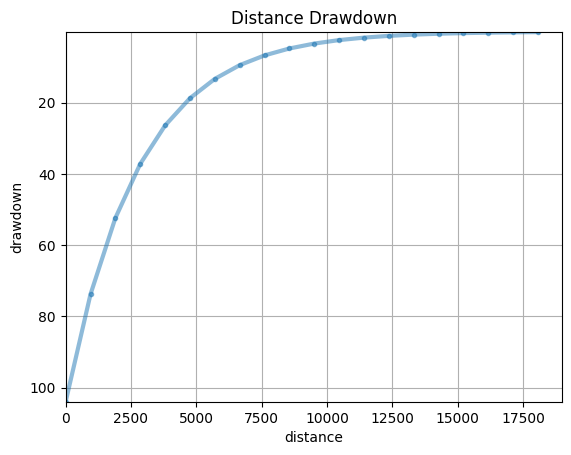

        distance    drawdown        head
0       0.000000  103.968183   50.031817
1     951.477864   73.787999   80.212001
2    1902.955728   52.368605  101.631395
3    2854.433591   37.166895  116.833105
4    3805.911455   26.377982  127.622018
5    4757.389319   18.720905  135.279095
6    5708.867183   13.286547  140.713453
7    6660.345046    9.429690  144.570310
8    7611.822910    6.692412  147.307588
9    8563.300774    4.749719  149.250281
10   9514.778638    3.370957  150.629043
11  10466.256501    2.392426  151.607574
12  11417.734365    1.697946  152.302054
13  12369.212229    1.205061  152.794939
14  13320.690093    0.855252  153.144748
15  14272.167956    0.606987  153.393013
16  15223.645820    0.430789  153.569211
17  16175.123684    0.305739  153.694261
18  17126.601548    0.216988  153.783012
19  18078.079411    0.154000  153.846000


In [32]:
print(S7.dd(n=20))

## `MineSteadyStripLeakyQ` Class
Predict steady state inflow rate for specified drawdown of pit water level for a strip-type mine and leaky aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [33]:
S6 = pygaf.MineSteadyStripLeakyQ()
S6.info()
S6.aq.info()

METHOD REFERENCE
----------------
Nguyen V. U. and Raudkivi A. J. 1982. Transient two-dimensional
groundwater flow. Hydrological Sciences; 4, 427-438.

Mine strip with steady-state, leaky-confined, horizontal flow
perpendicular to the pit wall. The solution estimates the inflow
rate to the pit for prescribed drawdown at the pit wall.

Lower Aquifer Conceptual Model:
- Infinite, leaky and homogeneous lower aquifer each side of
  mine pit.
- Mine pit fully penetrates lower aquifer.
- Steady, horizontal, 1D and leaky flow.
- Horizontal pre-mining groundwater head.
- The mine pit should be long compared to its width such that
  it is reasonable to neglect groundwater inflow from the end walls.

Notes:
- A steady state occurs when inflow to the mine pit is equal
  to leakage from the upper aquifer to the lower aquifer.

AQUIFER INFORMATION
-------------------
Type: 2D, leaky homogeneous aquifer
Name: 2d leaky aquifer
Hydraulic conductivity: 1 [L/T]
Specific storativity: 0.0001 [1/L]
Aquifer

Display drawings of the solution cartoon and aquifer.

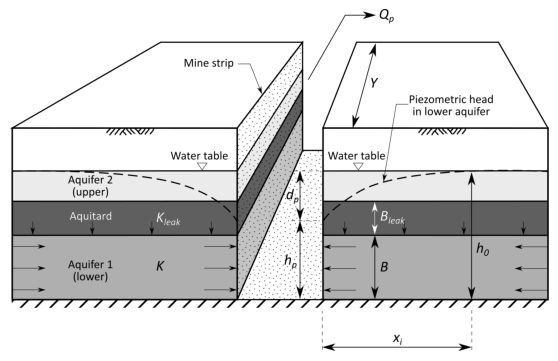

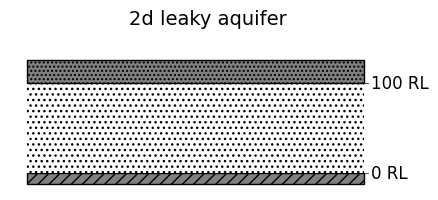

In [34]:
S6.draw(dw=7)
S6.aq.draw()

Specify solution input values.

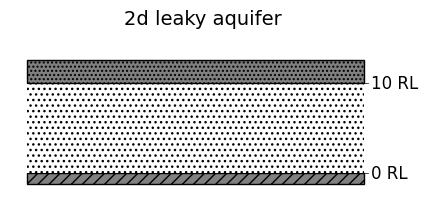

In [35]:
S6.Y = 5000
S6.aq.K = 1.54
S6.aq.Kleak = 1e-5
S6.aq.B = 10
S6.aq.Bleak = 5
S6.hp = 50
S6.h0 = 154
S6.aq.draw()

### Length of influence
The length of influence is the distance from the pit wall wherein drawdown is greather than 0.1% of initial groundwater head.

In [36]:
print('Length of influence:', round(S6.xi, 1))

Length of influence: 18078.9


### Mine pit inflow rate
Evaluate mine pit inflow rate for specified drawdown of the pit water level.

In [37]:
print('Steady pit inflow rate:', round(S6.qp, 1))

Steady pit inflow rate: 5771.8


### Distance drawdown method
Evaluate drawdown at varying distance from the mine pit wall; maximum drawdown distance is set automatically based on length of influence.

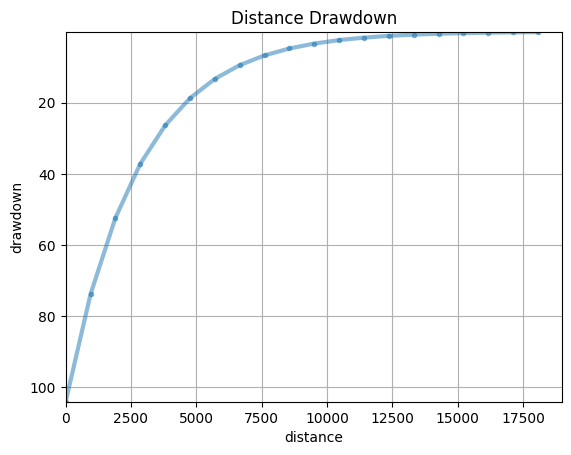

        distance    drawdown        head
0       0.000000  104.000000   50.000000
1     951.522551   73.809391   80.190609
2    1903.045102   52.382944  101.617056
3    2854.567652   37.176473  116.823527
4    3806.090203   26.384354  127.615646
5    4757.612754   18.725126  135.274874
6    5709.135305   13.289329  140.710671
7    6660.657855    9.431512  144.568488
8    7612.180406    6.693598  147.306402
9    8563.702957    4.750484  149.249516
10   9515.225508    3.371446  150.628554
11  10466.748059    2.392734  151.607266
12  11418.270609    1.698137  152.301863
13  12369.793160    1.205178  152.794822
14  13321.315711    0.855321  153.144679
15  14272.838262    0.607026  153.392974
16  15224.360812    0.430810  153.569190
17  16175.883363    0.305748  153.694252
18  17127.405914    0.216991  153.783009
19  18078.928465    0.154000  153.846000


In [38]:
print(S6.dd(n=20))

## `MineSteadyStripUnconfQ` Class
Predict steady state inflow rate for specified drawdown of pit water level for a strip-type mine and unconfined aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [39]:
S5 = pygaf.MineSteadyStripUnconfQ()
S5.info()
S5.aq.info()

METHOD REFERENCE
----------------
Singh R. N., Ngah S. A. and Atkins A. S. (1985) - Applicability
of Current Groundwater Theories for the Prediction of Water Inflows
to Surface mining Excavations.

Mine strip with steady, unconfined, horizontal flow
perpendicular to the mine pit wall. The solution estimates the
steady-state inflow rate and drawdown with distance from the pit
wall.

Conceptual Model:
- Semi-infinite, unconfined and homogeneous aquifer each side
  of the mine pit.
- Mine pit walls are approximated by a vertical faces.
- Flow is steady, horizontal and perpendicular to the pit walls.
- Uniform recharge.
- Horizontal pre-mining water table.
- The mine pit should be long compared to its width such that
  it is reasonable to neglect groundwater inflow from the end walls.

Notes:
- Steady state approximation is reasonable for moderate to
  to large hydraulic conductivity and mine pits excavated over years.
- The length of influence is defined by the length of aquifer
  over wh

Display drawings of the solution cartoon and aquifer.

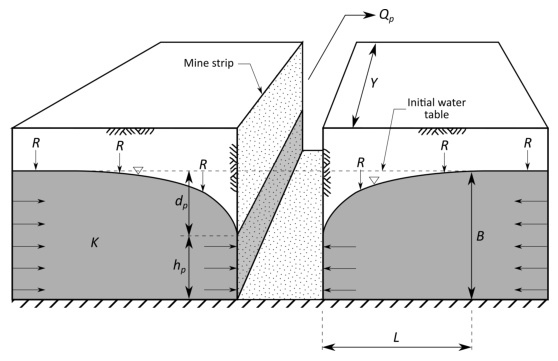

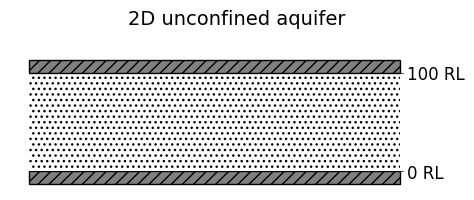

In [40]:
S5.draw(dw=7)
S5.aq.draw()

Specify solution input values.

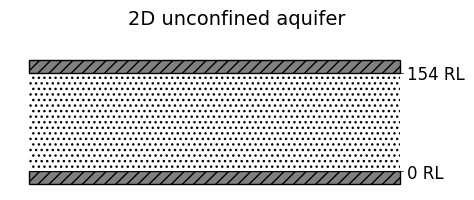

In [41]:
S5.Y = 5000
S5.aq.K = 0.1
S5.R = 50/1000/365
S5.hp = 50
S5.aq.B = 154
S5.aq.draw()

### Length of influence
Length of influence is the distance from the pit wall wherein drawdown is greather than 0.1% of initial groundwater head.

In [42]:
print('Length of influence:', round(S5.xi, 1))

Length of influence: 3935.4


### Mine pit inflow rate
Evaluate inflow rate to the mine pit for specified drawdown of the mine pit water level.

In [43]:
print('Steady pit inflow rate:', round(S5.qp, 1))

Steady pit inflow rate: 5391.0


### Distance drawdown method
Evaulate drawdown at varying distnave from the mine pit wall; maximum drawdown distance is set automatically based on length of influence.

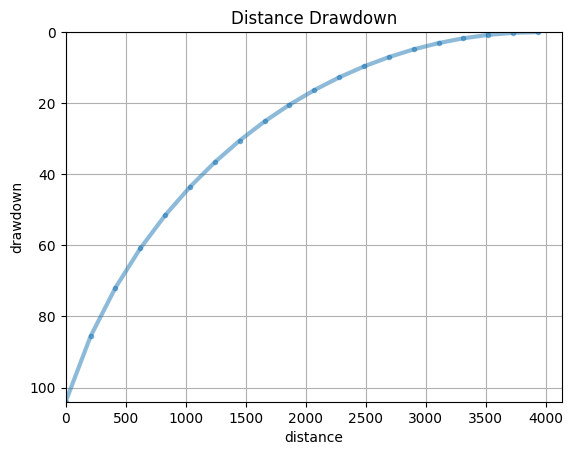

       distance    drawdown        head
0      0.000000  104.000000   50.000000
1    207.128368   85.629735   68.370265
2    414.256735   71.954610   82.045390
3    621.385103   60.882554   93.117446
4    828.513470   51.565966  102.434034
5   1035.641838   43.559683  110.440317
6   1242.770206   36.595332  117.404668
7   1449.898573   30.496526  123.503474
8   1657.026941   25.140309  128.859691
9   1864.155308   20.437312  133.562688
10  2071.283676   16.320578  137.679422
11  2278.412044   12.738842  141.261158
12  2485.540411    9.652274  144.347726
13  2692.668779    7.029673  146.970327
14  2899.797146    4.846562  149.153438
15  3106.925514    3.083869  150.916131
16  3314.053882    1.726991  152.273009
17  3521.182249    0.765149  153.234851
18  3728.310617    0.190930  153.809070
19  3935.438984    0.000000  154.000000


In [44]:
print(S5.dd(n=20))

## `MineTransRadConfDD` Class
Predict transient drawdown for specified mine pit inflow rate for a radial-type mine and confined aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [45]:
S4 = pygaf.MineTransRadConfDD()
S4.info()
S4.aq.info()

METHOD REFERENCE
----------------
Leczfalvy S. (1982) - Simplified Mathematical Models for the
Calculation of Dewatering.

Radial-symmetric, confined, horizontal flow to a large
diameter well. The solution estimates transient drawdown at the pit
wall for a constant inflow rate to the pit.

Aquifer Conceptual Model:
- Infinite, confined and homogeneous aquifer.
- Mine pit is approximated by a cylinder.
- Dewatering via an imaginary pumping well with radius rp.
- Mine pit fully penetrates aquifer.
- Transient, horizontal, axially symmetric and confined flow.
- Horizontal pre-mining groundwater head.

Notes:
- Inflow to the mine pit is constant and drawdown is transient.
- A steady state is not reached because all discharge is from
  aquifer storage.

AQUIFER INFORMATION
-------------------
Type: 2D, confined homogeneous aquifer
Name: 2D confined aquifer
Hydraulic conductivity: 1 [L/T]
Specific storativity: 0.0001 [1/L]
Aquifer thickness: 100 [L]
Transmissivity: 100 [L2/T]
Storage coeffic

Display drawings of the solution cartoon and aquifer.

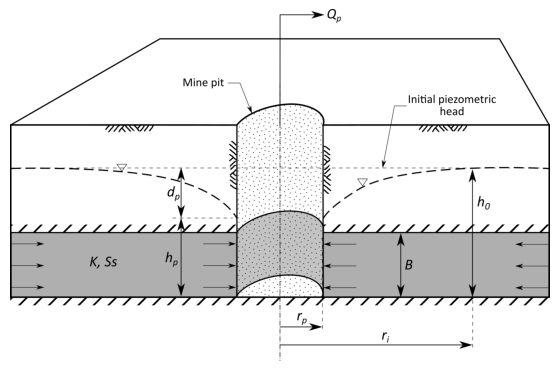

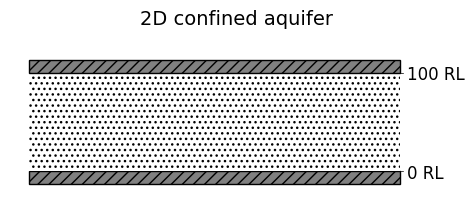

In [46]:
S4.draw(dw=7)
S4.aq.draw()

Specify solution input values.

Note: Because all discharge is derived from aquifer storage, a steady state is never reached. A target drawdown for the mine pit is defined using the property `.dp_targ`. The solution is evaluated over the time period required to reach the target drawdown.

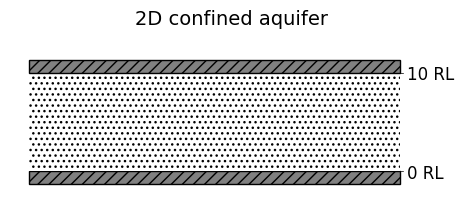

In [47]:
S4.aq.K = 1.0
S4.aq.B = 10
S4.aq.Ss = 0.001
S4.dp_targ = 40
S4.h0 = 154
S4.rp = 127
S4.qp = 1000
S4.aq.draw()

### Target drawdown time

In [48]:
print('Mine pit drawdown target reached at time:', round(S4.dp_targ_time, 1))

Mine pit drawdown target reached at time: 1090.5


### Radius of influence

In [49]:
print('Radius of influence at target drawdown time:', round(S4.ri(S4.dp_targ_time), 1))

Radius of influence at target drawdown time: 3614.9


### Transient drawdown of mine pit water level
Maximum time for evaluating drawdown is set automaticallly based on the target drawdown time.

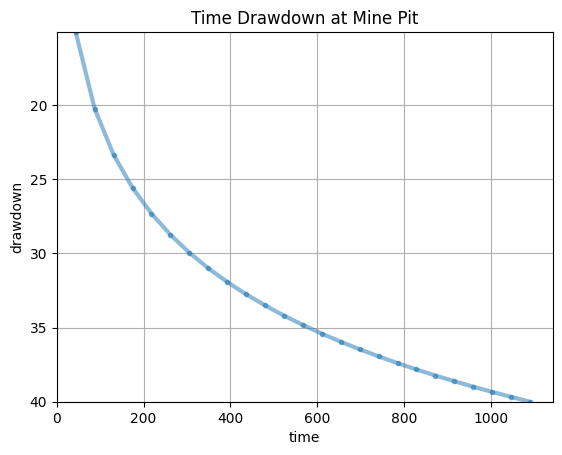

           time   drawdown        head           ri
0     43.620440  15.074615  138.925385   722.980383
1     87.240879  20.235150  133.764850  1022.448663
2    130.861319  23.341468  130.658532  1252.238756
3    174.481758  25.570287  128.429713  1445.960765
4    218.102198  27.309606  126.690394  1616.633282
5    261.722637  28.736161  125.263839  1770.933032
6    305.343077  29.945464  124.054536  1912.826295
7    348.963516  30.995018  123.004982  2044.897325
8    392.583956  31.922144  122.077856  2168.941148
9    436.204395  32.752443  121.247557  2286.264713
10   479.824835  33.504239  120.495761  2397.854660
11   523.445274  34.191103  119.808897  2504.477512
12   567.065714  34.823365  119.176635  2606.742841
13   610.686153  35.409069  118.590931  2705.144890
14   654.306593  35.954606  118.045394  2800.090982
15   697.927032  36.465131  117.534869  2891.921531
16   741.547472  36.944869  117.055131  2980.924483
17   785.167911  37.397324  116.602676  3067.345988
18   828.788

In [50]:
print(S4.dp())

### Radial drawdown at specified time
Evaluate radial drawdown at specified time; maximum drawdowen distance is set automatically based on radius of influence.

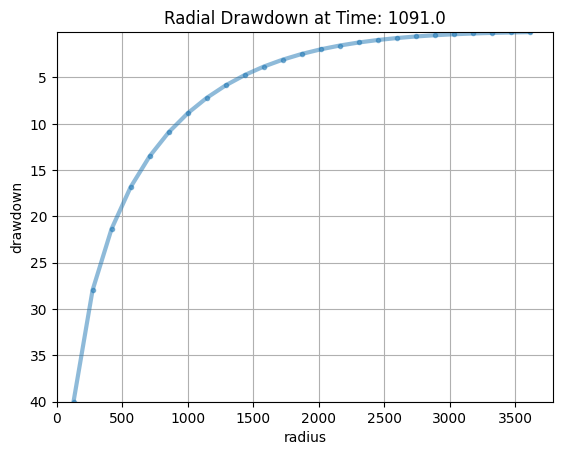

         radius   drawdown        head
0    127.000000  40.000059  113.999941
1    272.329246  27.964653  126.035347
2    417.658493  21.338709  132.661291
3    562.987739  16.839254  137.160746
4    708.316986  13.506251  140.493749
5    853.646232  10.922274  143.077726
6    998.975478   8.865794  145.134206
7   1144.304725   7.203453  146.796547
8   1289.633971   5.847478  148.152522
9   1434.963218   4.736093  149.263907
10  1580.292464   3.823506  150.176494
11  1725.621710   3.074379  150.925621
12  1870.950957   2.460591  151.539409
13  2016.280203   1.959249  152.040751
14  2161.609450   1.551411  152.448589
15  2306.938696   1.221229  152.778771
16  2452.267942   0.955363  153.044637
17  2597.597189   0.742553  153.257447
18  2742.926435   0.573288  153.426712
19  2888.255682   0.439559  153.560441
20  3033.584928   0.334642  153.665358
21  3178.914174   0.252925  153.747075
22  3324.243421   0.189752  153.810248
23  3469.572667   0.141289  153.858711
24  3614.901914   0.10440

In [51]:
print(S4.dd(S4.dp_targ_time))

## `MineSteadyRadLeakyDD` Class
Predict steady state drawdown for specified mine pit inflow rate for a radial-type mine and leaky aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [52]:
S3 = pygaf.MineSteadyRadLeakyDD()
S3.info()
S3.aq.info()

METHOD REFERENCE
----------------
Bouwer H. (2000) - Groundwater Hydrology.

Radial-symmetric, leaky-confined, horizontal flow to a large
diameter well. The solution estimates the steady-state inflow rate
to the pit and drawdown with radial distance from the pit wall.

Lower Aquifer Conceptual Model:
- Infinite, leaky and homogeneous lower aquifer.
- Mine pit is approximated by a cylinder.
- Mine pit fully penetrates lower aquifer.
- Steady, horizontal, axially symmetric and confined flow.
- Horizontal pre-mining groundwater head.

Notes:
- A steady state occurs when inflow to the mine pit is equal
  to leakage from the upper aquifer to the lower aquifer.

AQUIFER INFORMATION
-------------------
Type: 2D, leaky homogeneous aquifer
Name: 2D leaky aquifer
Hydraulic conductivity: 1 [L/T]
Specific storativity: 0.0001 [1/L]
Aquifer thickness: 100 [L]
Transmissivity: 100 [L2/T]
Storage coefficient: 0.01 [1]
Diffusivity: 10000.0 [L2/T]
Bottom elevation: 0 [RL]
Top elevation: 100 [RL]
Leaky la

Display drawings of the solution cartoon and aquifer.

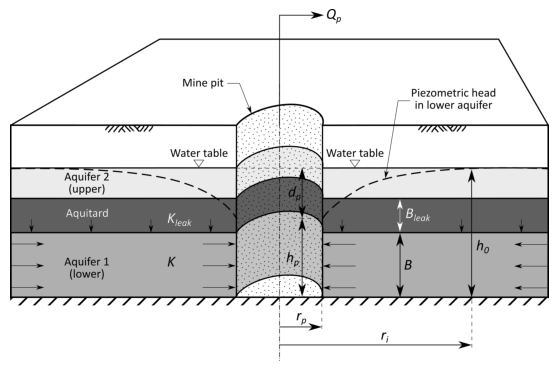

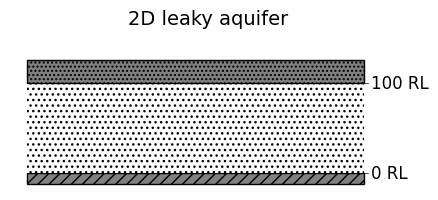

In [53]:
S3.draw(dw=7)
S3.aq.draw()

Specify solution input values.

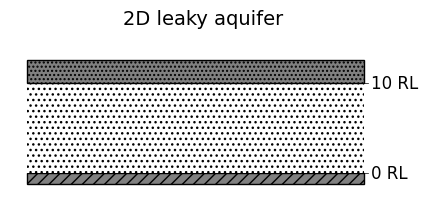

In [54]:
S3.aq.K = 1.54
S3.aq.Kleak = 1e-5
S3.aq.B = 10
S3.aq.Bleak = 5
S3.h0 = 154
S3.rp = 127
S3.qp = 3000
S3.aq.draw()

### Aquitard leakage factor

In [55]:
print('The aquitard leakage factor is:', round(S3.lfac, 1))

The aquitard leakage factor is: 2774.9


### Radius of influence
The radius of influence is defined as the radius wherein drawdown is greather than 0.1% of the initial groundwater head.

In [56]:
print('The radius of influence is:', round(S3.ri, 1))

The radius of influence is: 13124.3


### Radial drawdown method
Evaluate radial drawdown at varying distance from the mine pit wall; maximum drawdown distance is set automatically based on radius of influence.

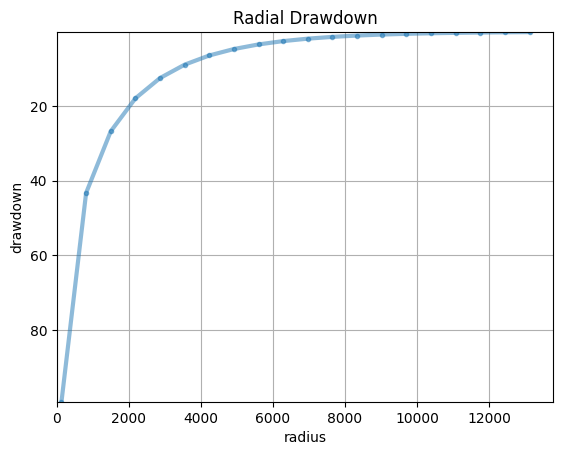

          radius   drawdown        head       leakage
0     127.000000  99.285080   54.714920  1.985702e-04
1     811.070443  43.293434  110.706566  8.658687e-05
2    1495.140886  26.761816  127.238184  5.352363e-05
3    2179.211329  17.925567  136.074433  3.585113e-05
4    2863.281772  12.474788  141.525212  2.494958e-05
5    3547.352214   8.880754  145.119246  1.776151e-05
6    4231.422657   6.418517  147.581483  1.283703e-05
7    4915.493100   4.689484  149.310516  9.378968e-06
8    5599.563543   3.454292  150.545708  6.908584e-06
9    6283.633986   2.560714  151.439286  5.121429e-06
10   6967.704429   1.908039  152.091961  3.816078e-06
11   7651.774872   1.427710  152.572290  2.855421e-06
12   8335.845315   1.072065  152.927935  2.144131e-06
13   9019.915758   0.807421  153.192579  1.614842e-06
14   9703.986200   0.609669  153.390331  1.219339e-06
15  10388.056643   0.461380  153.538620  9.227597e-07
16  11072.127086   0.349844  153.650156  6.996870e-07
17  11756.197529   0.265731 

In [57]:
print(S3.dd(n=20))

## `MineSteadyRadUnconfQ` Class
Predict steady state mine inflow for specified mine pit water level for a radial-type mine and unconfined aquifer.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [58]:
S1 = pygaf.MineSteadyRadUnconfQ()
S1.info()
S1.aq.info()

METHOD REFERENCE
----------------
Bouwer H. (1978) - Groundwater Hydrology.

Radial-symmetric, unconfined, horizontal flow to a large
diameter well. The solution estimates the steady-state inflow rate
to the pit and drawdown with radial distance from the pit wall.

Conceptual Model:
- Infinite, unconfined and homogeneous aquifer.
- Mine pit is approximated by a cylinder.
- Dewatering via an imaginary pumping well with radius rp.
- Steady, horizontal, axially symmetric and unconfined flow.
- Uniform recharge.
- Horizontal pre-mining water table.

Notes:
- Steady state approximation is reasonable for moderate to
  to large hydraulic conductivity and mine pits excavated over years.
- The radius of influence is implicit and defined by the radius
  at which drawdown is zero.

AQUIFER INFORMATION
-------------------
Type: 2D, unconfined homogeneous aquifer
Name: 2D unconfined aquifer
Hydraulic conductivity: 1 [L/T]
Specific yield: 0.1 [1]
Static saturated thickness: 100 [L]
Static transmissi

Display drawings of the solution cartoon and aquifer.

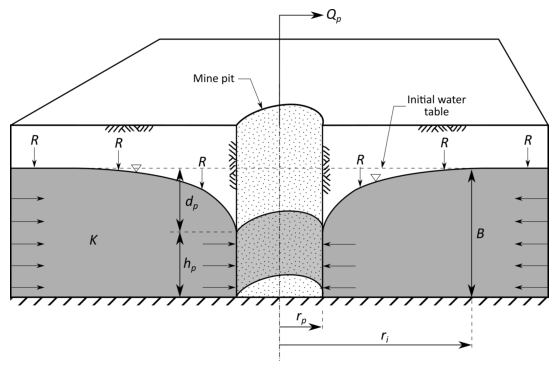

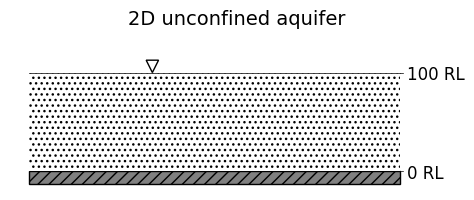

In [59]:
S1.draw(dw=7)
S1.aq.draw()

Specifiy solution input values.

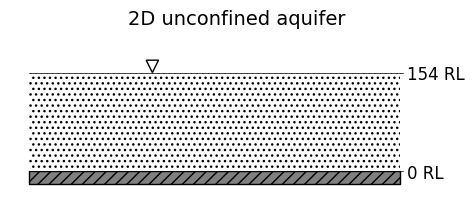

In [60]:
S1.aq.K = 0.1
S1.aq.B = 154
S1.hp = 50
S1.rp = 127
S1.R = 50/1000/365
S1.aq.draw()

### Radius of influence
The radius of influence is defined as the radius wherein total recharge is equal to steady state mine inflow.

In [61]:
print('The radius of influence is:', round(S1.ri, 1))

The radius of influence is: 2310.5


### Mine inflow

In [62]:
print('The steady pit inflow rate is:', round(S1.qp, 1))

The steady pit inflow rate is: 2290.6


Evaluate inflow rates for different drawdown values.

In [63]:
from numpy import linspace
import pandas
hp = [i for i in linspace(S1.aq.B-5, S1.aq.B/3, 10)]
dp = [S1.dp for S1.hp in hp]
qp = [S1.qp for S1.hp in hp]
df = pandas.DataFrame({'pit head':hp, 'pit drawdown':dp, 'pit inflow':qp})
print(df)

     pit head  pit drawdown   pit inflow
0  149.000000      5.000000   255.192098
1  138.148148     15.851852   635.671196
2  127.296296     26.703704   950.937611
3  116.444444     37.555556  1225.252918
4  105.592593     48.407407  1466.664320
5   94.740741     59.259259  1679.202446
6   83.888889     70.111111  1865.266495
7   73.037037     80.962963  2026.427032
8   62.185185     91.814815  2163.772412
9   51.333333    102.666667  2278.082203


### Radial drawdown method
Evaluate radial drawdown at varying distance from the mine pit wall; maximum drawdown distance is set automatically based on radius of influence.

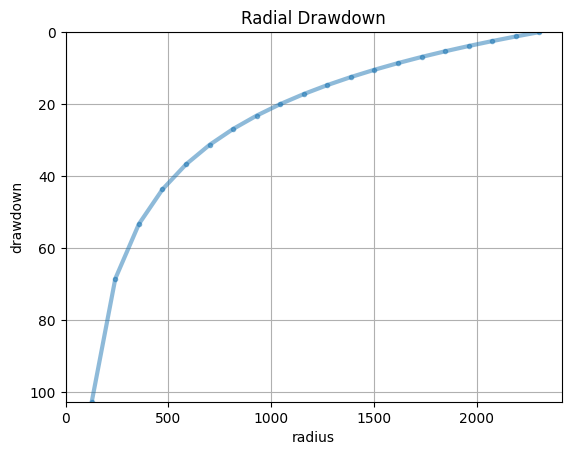

         radius    drawdown        head
0    127.000000  102.666419   51.333581
1    241.592726   68.487133   85.512867
2    356.185452   53.322334  100.677666
3    470.778179   43.705769  110.294231
4    585.370905   36.742154  117.257846
5    699.963631   31.322494  122.677506
6    814.556357   26.907368  127.092632
7    929.149083   23.195145  130.804855
8   1043.741810   20.000746  133.999254
9   1158.334536   17.202764  136.797236
10  1272.927262   14.717438  139.282562
11  1387.519988   12.484647  141.515353
12  1502.112714   10.459840  143.540160
13  1616.705441    8.609127  145.390873
14  1731.298167    6.906152  147.093848
15  1845.890893    5.330031  148.669969
16  1960.483619    3.863949  150.136051
17  2075.076345    2.494174  151.505826
18  2189.669072    1.209354  152.790646
19  2304.261798    0.000000  154.000000


In [64]:
print(S1.dd(n=20))

## `MineSteadyRadUnconfQ2` Class
Predict steady state mine inflow for specified mine pit water level for a radial-type mine and unconfined aquifer with leakage through the pit floor.

Instanciate a default solution class and display information using the `.info` and `.aq.info` methods.

In [65]:
S2 = pygaf.MineSteadyRadUnconfQ2()
S2.info()
S2.aq.info()

METHOD REFERENCE
----------------
Marinelle F. and Niccoli W. (2000) - Simple Analytical
Equations for Estimating Ground Water Inflow to a Mine Pit.

Radial-symmetric, unconfined, horizontal flow to a large
diameter well. The solution estimates the steady-state inflow rate
to the pit and drawdown with radial distance from the pit wall.

Upper Aquifer Conceptual Model:
- Infinite, unconfined and homogeneous aquifer.
- Mine pit is approximated by a cylinder.
- Mine pit fully penetrates aquifer.
- Steady, horizontal, axially symmetric and unconfined flow.
- Uniform recharge.
- Horizontal pre-mining water table.

Lower Aquifer Conceptual Model:
- Semi-infinite, confined and anisotropic aquifer.
- Hydraulic head is initially hydrostatic and equal to B.
- The pit floor (disk sink) has uniform head equal to D.
- Flow to the pit floor is 3D and radially symmetric.

Notes:
- Steady state approximation is reasonable for moderate to
  to large hydraulic conductivity and mine pits excavated over y

Display drawings of the solution cartoon and aquifer.

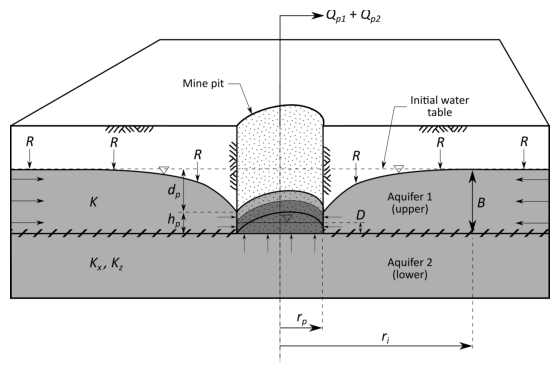

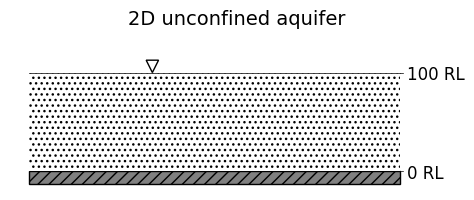

In [66]:
S2.draw(dw=7)
S2.aq.draw()

Specifiy solution input values.

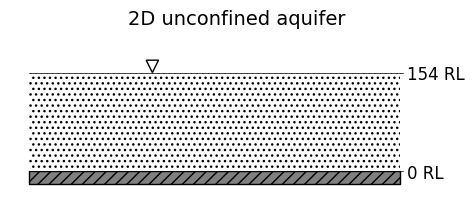

In [67]:
S2.aq.K = 0.1
S2.aq.B = 154
S2.hp = 50
S2.rp = 127
S2.R = 50/1000/365
S2.aq2kx = 0.01
S2.aq2kz = 0.01
S2.D = 1
S2.aq.draw()

### Radius of influence
The radius of influence is the radius of the recharge area contributing to steady mine inflow from the upper aquifer.

In [68]:
print('The radius of influence is:', round(S2.ri, 1))

The radius of influence is: 2498.7


### Mine inflow
Evaluate steady state inflow rates to the mine pit.

In [69]:
print('The steady pit inflow rate from the upper aquifer is:', round(S2.qp1, 1))
print('The steady pit inflow rate from the lower aquifer is:', round(S2.qp2, 1))
print('The steady total pit inflow rate is:', round(S2.qp, 1))

The steady pit inflow rate from the upper aquifer is: 2680.0
The steady pit inflow rate from the lower aquifer is: 777.2
The steady total pit inflow rate is: 3457.2


Evaluate inflow rates for different drawdown values.

In [70]:
from numpy import linspace
import pandas
hp = [i for i in linspace(S2.aq.B-5, S2.aq.B/3, 10)]
dp = [S2.dp for S2.hp in hp]
qp1 = [S2.qp1 for S2.hp in hp]
qp2 = [S2.qp2 for S2.hp in hp]
qp = [S2.qp for S2.hp in hp]
df = pandas.DataFrame({'pit head':hp, 'pit drawdown':dp, 'upper inflow':qp1, 'lower inflow':qp2, 'total inflow':qp})
print(df)

     pit head  pit drawdown  upper inflow  lower inflow  total inflow
0  149.000000      5.000000    323.221252        777.24   1100.461252
1  138.148148     15.851852    773.024649        777.24   1550.264649
2  127.296296     26.703704   1140.361598        777.24   1917.601598
3  116.444444     37.555556   1457.837732        777.24   2235.077732
4  105.592593     48.407407   1736.061340        777.24   2513.301340
5   94.740741     59.259259   1980.292279        777.24   2757.532279
6   83.888889     70.111111   2193.639180        777.24   2970.879180
7   73.037037     80.962963   2378.126180        777.24   3155.366180
8   62.185185     91.814815   2535.150149        777.24   3312.390149
9   51.333333    102.666667   2665.708379        777.24   3442.948379


### Radial drawdown method
Maximum drawdown distance is set automatically based on radius of influence.

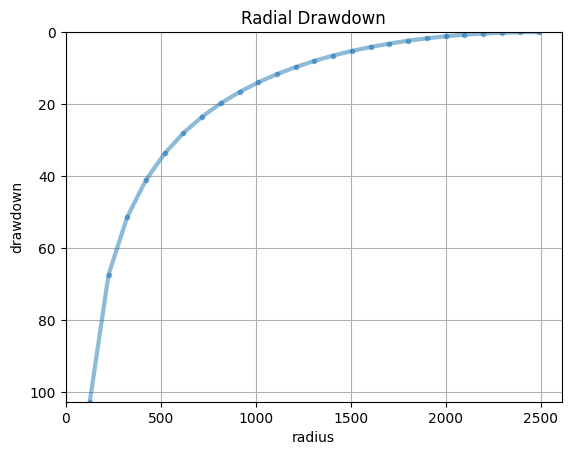

         radius      drawdown        head
0    127.000000  1.026667e+02   51.333333
1    225.543930  6.741305e+01   86.586949
2    324.087860  5.131554e+01  102.684461
3    422.631790  4.107403e+01  112.925971
4    521.175719  3.370210e+01  120.297896
5    619.719649  2.803225e+01  125.967747
6    718.263579  2.348953e+01  130.510472
7    816.807509  1.974975e+01  134.250252
8    915.351439  1.661282e+01  137.387184
9   1013.895369  1.394691e+01  140.053090
10  1112.439298  1.166080e+01  142.339203
11  1210.983228  9.688858e+00  144.311142
12  1309.527158  7.982404e+00  146.017596
13  1408.071088  6.504386e+00  147.495614
14  1506.615018  5.226006e+00  148.773994
15  1605.158948  4.124485e+00  149.875515
16  1703.702877  3.181527e+00  150.818473
17  1802.246807  2.382253e+00  151.617747
18  1900.790737  1.714428e+00  152.285572
19  1999.334667  1.167901e+00  152.832099
20  2097.878597  7.341823e-01  153.265818
21  2196.422527  4.061308e-01  153.593869
22  2294.966456  1.777065e-01  153

In [71]:
print(S2.dd(n=25))